## Test trained CNNs models in Keras

### Description: Evaluating accuracy of every deep model on testing dataset and Display confusion matrix  


### Algorithm:

**--> Step 1:** Load saved CNN model  
**--> Step 2:** Load and assign best weights  
**--> Step 3: Predict with test dataset**  
**--> Step 4:** Build classification report & confusion matrix  
**--> Step 5:** Test on one image  


**Result:**  
- Accuracy results  
- Classification reports  
- Confusion matrices  
- Classified one image  
- Bar chart of classification  

## Importing libraries

In [1]:
# Importing needed libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py
import cv2


from tensorflow.keras.models import load_model

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from timeit import default_timer as timer


## Setting up full paths

In [2]:
# Full or absolute path to preprocessed datasets
full_path_to_code = \
    'C:/Users/yashs/PycharmProjects/InternshipCNN/TCS'


### Dataset, 1st model

## Loading saved 1st model

In [3]:
# Defining lists to collect models in
model_rgb = []
model_gray = []


# Loading 1st model for custom dataset
for i in range(2):
    model_rgb.append(load_model(full_path_to_code + '/' + 
                                'custom' + '/' + 
                                'model_1_custom_rgb.h5'))
    
    model_gray.append(load_model(full_path_to_code + '/' + 
                                 'custom' + '/' + 
                                 'model_1_custom_gray.h5'))


# Check point
print('Models are successfully loaded')


Models are successfully loaded


In [4]:
# Showing models' input shapes
print(model_rgb[0].layers[0].input_shape)
print()
print(model_gray[0].layers[0].input_shape)


(None, 64, 64, 3)

(None, 64, 64, 1)


### Dataset, 1st model

## Loading and assigning best weights

In [5]:
# Preparing list with weights' names
weights = ['w_1_custom_rgb_255_mean.h5',
           'w_1_custom_rgb_255_mean_std.h5',
           'w_1_custom_gray_255_mean.h5',
           'w_1_custom_gray_255_mean_std.h5']


# Loading best weights for 1st model
for i in range(4):    
    # Checking if it is RGB model
    if i <= 1:
        # loading and assigning best weights
        model_rgb[i].load_weights('custom' + '/' + weights[i])
        
        
        print('Best weights for 1st RGB model are loaded and assigned  : ', weights[i])
    
    # Checking if it is GRAY model
    elif i >= 2:
        # loading and assigning best weights
        model_gray[i-2].load_weights('custom' + '/' + weights[i])
        
        
        print('Best weights for 1st GRAY model are loaded and assigned : ', weights[i])


Best weights for 1st RGB model are loaded and assigned  :  w_1_custom_rgb_255_mean.h5
Best weights for 1st RGB model are loaded and assigned  :  w_1_custom_rgb_255_mean_std.h5
Best weights for 1st GRAY model are loaded and assigned :  w_1_custom_gray_255_mean.h5
Best weights for 1st GRAY model are loaded and assigned :  w_1_custom_gray_255_mean_std.h5


### Dataset, 1st model

## Predicting with test dataset

In [6]:
# Preparing list with datasets' names
datasets = ['dataset_custom_rgb_255_mean.hdf5',
            'dataset_custom_rgb_255_mean_std.hdf5',
            'dataset_custom_gray_255_mean.hdf5',
            'dataset_custom_gray_255_mean_std.hdf5']


# Defining variable to identify the best model
accuracy_best = 0


# Testing 1st model with all custom datasets in a loop
for i in range(4):    
    # Opening saved custom dataset from HDF5 binary file
    # Initiating File object
    # Opening file in reading mode by 'r'
    with h5py.File(full_path_to_code + '/' + 'custom' + '/' + datasets[i], 'r') as f:
        # Extracting saved arrays for testing by appropriate keys
        # Saving them into new variables
        x_test = f['x_test']  # HDF5 dataset
        y_test = f['y_test']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_test = np.array(x_test)  # Numpy arrays
        y_test = np.array(y_test)  # Numpy arrays
    
    
    print('Dataset is opened :', datasets[i])
    
    
    # Showing shapes of loaded arrays
    if i == 0:
        print('x_test shape      :', x_test.shape)
        print('y_test shape      :', y_test.shape)
    
    
    # Checking if RGB dataset is opened
    if i <= 1:
        # Testing RGB model with current dataset
        temp = model_rgb[i].predict(x_test)
        
        
        # Showing prediction shape and scores
        if i == 0:
            print('prediction shape  :', temp.shape)  # (278, 5)
            print('prediction scores :', temp[0])  # 5 score numbers
        
        
        # Getting indexes of maximum values along specified axis
        temp = np.argmax(temp, axis=1)
        
        
        # Showing prediction shape after convertion
        # Showing predicted and correct indexes of classes
        if i == 0:
            print('prediction shape  :', temp.shape)  # (278,)
            print('predicted indexes :', temp[0:10])
            print('correct indexes   :', y_test[:10])
        
        
        # Calculating accuracy
        # We compare predicted class with correct class for all input images
        # By saying 'temp == y_test' we create Numpy array with True and False values
        # By function 'np.mean' we calculate mean value:
        # all_True / (all_True + all_False)
        accuracy = np.mean(temp == y_test)
        
        
        # Showing True and False matrix
        if i == 0:
            print('T and F matrix    :', (temp == y_test)[0:10])
        
        
        # Showing calculated accuracy
        print('Testing accuracy  : {0:.5f}'.format(accuracy))
        print()
        
    # Checking if GRAY dataset is opened
    elif i >= 2:
        # Testing GRAY model with current dataset
        temp = model_gray[i-2].predict(x_test)
        
        
        # Getting indexes of maximum values along specified axis
        temp = np.argmax(temp, axis=1)
        
        
        # Calculating accuracy
        # We compare predicted class with correct class for all input images
        # By saying 'temp == y_test' we create Numpy array with True and False values
        # By function 'np.mean' we calculate mean value:
        # all_True / (all_True + all_False)
        accuracy = np.mean(temp == y_test)
        
        
        # Showing calculated accuracy
        print('Testing accuracy  : {0:.5f}'.format(accuracy))
        print()
    
    
    # Identifying the best model
    # Saving predicted indexes of the best model
    if accuracy > accuracy_best:
        # Updating value of the best accuracy
        accuracy_best = accuracy
        
        # Saving predicted indexes of the best model into array
        # Updating array with predicted indexes of the best model
        y_predicted_best = temp
    

Dataset is opened : dataset_custom_rgb_255_mean.hdf5
x_test shape      : (278, 64, 64, 3)
y_test shape      : (278,)
prediction shape  : (278, 5)
prediction scores : [7.6303738e-03 8.2812786e-01 6.3232787e-02 1.0054756e-01 4.6144743e-04]
prediction shape  : (278,)
predicted indexes : [1 1 3 2 2 2 2 0 2 4]
correct indexes   : [1 1 2 2 2 0 2 0 2 4]
T and F matrix    : [ True  True False  True  True False  True  True  True  True]
Testing accuracy  : 0.64748

Dataset is opened : dataset_custom_rgb_255_mean_std.hdf5
Testing accuracy  : 0.67986

Dataset is opened : dataset_custom_gray_255_mean.hdf5
Testing accuracy  : 0.65108

Dataset is opened : dataset_custom_gray_255_mean_std.hdf5
Testing accuracy  : 0.65468



### Dataset, 1st model

## Classification report & Confusion matrix

In [7]:
# Showing the main classification metrics of the best model
print(classification_report(y_test, y_predicted_best))


              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.76      0.68      0.72        19
           2       0.59      0.72      0.64        67
           3       0.56      0.39      0.46        74
           4       0.71      0.89      0.79        19

    accuracy                           0.68       278
   macro avg       0.68      0.70      0.69       278
weighted avg       0.67      0.68      0.67       278



In [8]:
# Each row represents a number of actual class
# Each column represents a number of predicted class


# Computing confusion matrix to evaluate accuracy of classification
c_m = confusion_matrix(y_test, y_predicted_best)

# Showing confusion matrix in form of Numpy array
print(c_m)


[[82  0  8  8  1]
 [ 1 13  1  3  1]
 [ 6  1 48 10  2]
 [14  3 25 29  3]
 [ 0  0  0  2 17]]


In [9]:
# Preparing labels for dataset
labels_custom = ['Horse', 'Tiger', 'Cat', 'Dog', 'Polar bear']


# Showing labels
print(labels_custom)


['Horse', 'Tiger', 'Cat', 'Dog', 'Polar bear']


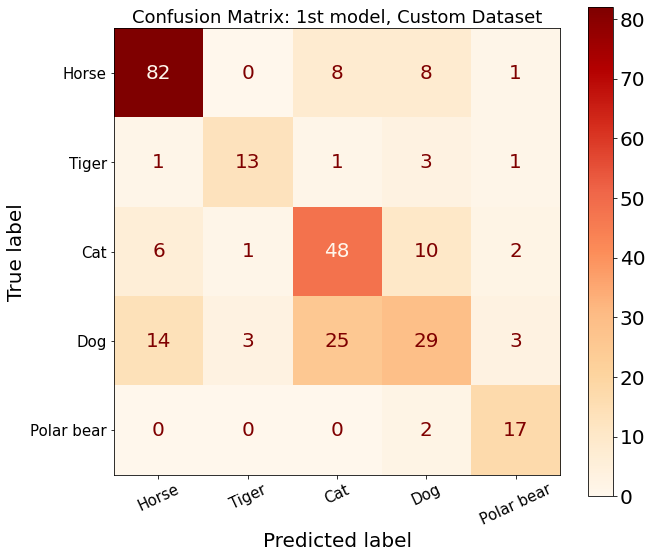

In [10]:
# Magic function that renders the figure in a jupyter notebook
%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of confusion matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels_custom)


# Plotting confusion matrix
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix: 1st model, Custom Dataset', fontsize=18)


# Saving plot
plt.savefig('confusion_matrix_model_1_custom_dataset.png', transparent=True, dpi=500)


# Showing the plot
plt.show()


### Dataset, 1st model

## Testing on one image

In [11]:
# Opening saved Mean Image for RGB custom dataset
# Initiating File object
# Opening file in reading mode by 'r'
with h5py.File(full_path_to_code + '/' + 'custom' + 
               '/' + 'mean_rgb_dataset_custom.hdf5', 'r') as f:
    # Extracting saved array for Mean Image
    # Saving it into new variable
    mean_rgb = f['mean']  # HDF5 dataset
    # Converting it into Numpy array
    mean_rgb = np.array(mean_rgb)  # Numpy arrays


# Opening saved Standard Deviation for RGB custom dataset
# Initiating File object
# Opening file in reading mode by 'r'
with h5py.File(full_path_to_code + '/' + 'custom' + '/' + 
               'std_rgb_dataset_custom.hdf5', 'r') as f:
    # Extracting saved array for Standard Deviation
    # Saving it into new variable
    std_rgb = f['std']  # HDF5 dataset
    # Converting it into Numpy array
    std_rgb = np.array(std_rgb)  # Numpy arrays


# Opening saved Mean Image for GRAY custom dataset
# Initiating File object
# Opening file in reading mode by 'r'
with h5py.File(full_path_to_code + '/' + 'custom' + '/' + 
               'mean_gray_dataset_custom.hdf5', 'r') as f:
    # Extracting saved array for Mean Image
    # Saving it into new variable
    mean_gray = f['mean']  # HDF5 dataset
    # Converting it into Numpy array
    mean_gray = np.array(mean_gray)  # Numpy arrays


# Opening saved Standard Deviation for GRAY custom dataset
# Initiating File object
# Opening file in reading mode by 'r'
with h5py.File(full_path_to_code + '/' + 'custom' + '/' + 
               'std_gray_dataset_custom.hdf5', 'r') as f:
    # Extracting saved array for Standard Deviation
    # Saving it into new variable
    std_gray = f['std']  # HDF5 dataset
    # Converting it into Numpy array
    std_gray = np.array(std_gray)  # Numpy arrays


# Showing shapes of loaded Numpy arrays
print('RGB Mean Image          :', mean_rgb.shape)
print('RGB Standard Deviation  :', std_rgb.shape)
print('GRAY Mean Image         :', mean_gray.shape)
print('GRAY Standard Deviation :', std_gray.shape)


RGB Mean Image          : (64, 64, 3)
RGB Standard Deviation  : (64, 64, 3)
GRAY Mean Image         : (64, 64, 1)
GRAY Standard Deviation : (64, 64, 1)


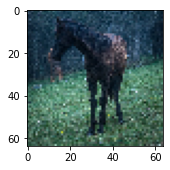

Shape of RGB image         : (64, 64, 3)
Pixels of RGB image        : [41 65 13 22 39]
RGB /255.0                 : [0.16078431 0.25490196 0.05098039 0.08627451 0.15294118]
RGB /255.0 => mean         : [-0.32579081 -0.22612242 -0.42893561 -0.39136561 -0.32490706]
RGB /255.0 => mean => std  : [-1.19034806 -0.83149456 -1.58358638 -1.45033082 -1.20502869]



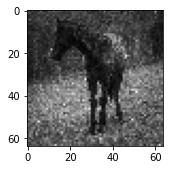

Shape of GRAY image        : (64, 64, 1)
Pixels of GRAY image       : [62 85 31 39 53]
GRAY /255.0                : [0.24313725 0.33333333 0.12156863 0.15294118 0.20784314]
GRAY /255.0 => mean        : [-0.2279122  -0.13194765 -0.34189346 -0.30844065 -0.25292965]
GRAY /255.0 => mean => std : [-0.85553946 -0.49778423 -1.29660031 -1.17596597 -0.96651603]


In [12]:
# Magic function that renders the figure in a jupyter notebook
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (2.5, 2.5)



# Reading image by OpenCV library
# In this way image is opened already as Numpy array
# OpenCV by default reads images in BGR order of channels
image_custom_bgr = cv2.imread('images_to_test' + '/' + 'custom_to_test_1.jpg')

# Swapping channels from BGR to RGB by OpenCV function
image_custom_rgb = cv2.cvtColor(image_custom_bgr, cv2.COLOR_BGR2RGB)

# Resizing image to 64 by 64 pixels size
image_custom_rgb = cv2.resize(image_custom_rgb,
                              (64, 64),
                              interpolation=cv2.INTER_CUBIC)

# Showing loaded and resized image
plt.imshow(image_custom_rgb)
plt.show()



# Implementing normalization by dividing image's pixels on 255.0
image_custom_rgb_255 = image_custom_rgb / 255.0

# Implementing normalization by subtracting Mean Image
image_custom_rgb_255_mean = image_custom_rgb_255 - mean_rgb

# Implementing preprocessing by dividing on Standard Deviation
image_custom_rgb_255_mean_std = image_custom_rgb_255_mean / std_rgb

# Showing shape of Numpy array with RGB image
# Showing some pixels' values
print('Shape of RGB image         :', image_custom_rgb.shape)
print('Pixels of RGB image        :', image_custom_rgb[:5, 0, 0])
print('RGB /255.0                 :', image_custom_rgb_255[:5, 0, 0])
print('RGB /255.0 => mean         :', image_custom_rgb_255_mean[:5, 0, 0])
print('RGB /255.0 => mean => std  :', image_custom_rgb_255_mean_std[:5, 0, 0])
print()



# Converting image to GRAY by OpenCV function
image_custom_gray = cv2.cvtColor(image_custom_rgb, cv2.COLOR_RGB2GRAY)

# Extending dimension from (height, width) to (height, width, one channel)
image_custom_gray = image_custom_gray[:, :, np.newaxis]

# Showing converted into GRAY image
plt.imshow(image_custom_gray, cmap=plt.get_cmap('gray'))
plt.show()



# Implementing normalization by dividing image's pixels on 255.0
image_custom_gray_255 = image_custom_gray / 255.0

# Implementing normalization by subtracting Mean Image
image_custom_gray_255_mean = image_custom_gray_255 - mean_gray

# Implementing preprocessing by dividing on Standard Deviation
image_custom_gray_255_mean_std = image_custom_gray_255_mean / std_gray

# Showing shape of Numpy array with GRAY image
# Showing some pixels' values
print('Shape of GRAY image        :', image_custom_gray.shape)
print('Pixels of GRAY image       :', image_custom_gray[:5, 0, 0])
print('GRAY /255.0                :', image_custom_gray_255[:5, 0, 0])
print('GRAY /255.0 => mean        :', image_custom_gray_255_mean[:5, 0, 0])
print('GRAY /255.0 => mean => std :', image_custom_gray_255_mean_std[:5, 0, 0])


In [13]:
# Extending dimension from (height, width, channels) to (1, height, width, channels)
image_custom_rgb_255_mean = image_custom_rgb_255_mean[np.newaxis, :, :, :]
image_custom_rgb_255_mean_std = image_custom_rgb_255_mean_std[np.newaxis, :, :, :]

image_custom_gray_255_mean = image_custom_gray_255_mean[np.newaxis, :, :, :]
image_custom_gray_255_mean_std = image_custom_gray_255_mean_std[np.newaxis, :, :, :]

# Showing shapes of extended Numpy arrays
print('RGB /255.0 => mean         :', image_custom_rgb_255_mean.shape)
print('RGB /255.0 => mean => std  :', image_custom_rgb_255_mean_std.shape)
print()
print('GRAY /255.0 => mean        :', image_custom_gray_255_mean.shape)
print('GRAY /255.0 => mean => std :', image_custom_gray_255_mean_std.shape)


RGB /255.0 => mean         : (1, 64, 64, 3)
RGB /255.0 => mean => std  : (1, 64, 64, 3)

GRAY /255.0 => mean        : (1, 64, 64, 1)
GRAY /255.0 => mean => std : (1, 64, 64, 1)


In [14]:
# Defining function to plot bar chart with scores values
def bar_chart(scores, bar_title, show_xticks=True, labels=None):
    # Arranging X axis
    x_positions = np.arange(scores.size)

    # Creating bar chart
    barlist = plt.bar(x_positions, scores, align='center', alpha=0.6)

    # Highlighting the highest bar
    barlist[np.argmax(scores)].set_color('red')

    # Giving labels to bars along X axis
    if show_xticks:
        plt.xticks(x_positions, labels, rotation=20, fontsize=15)

    # Giving name to axes
    plt.xlabel('Class', fontsize=20)
    plt.ylabel('Value', fontsize=20)

    # Giving name to bar chart
    plt.title('Classification: ' + bar_title, fontsize=20)

    # Showing bar chart
    plt.show()


print('Function to plot Bar Chart is successfully defined')


Function to plot Bar Chart is successfully defined



Scores shape        : (1, 5)
Scores values       : [9.7232831e-01 1.1738413e-05 2.1703079e-04 2.7442988e-02 4.0192564e-08]
Scores sum          : 1.0
Score of prediction : 0.97233
Class index         : 0
Label               : Horse
Time                : 0.16332


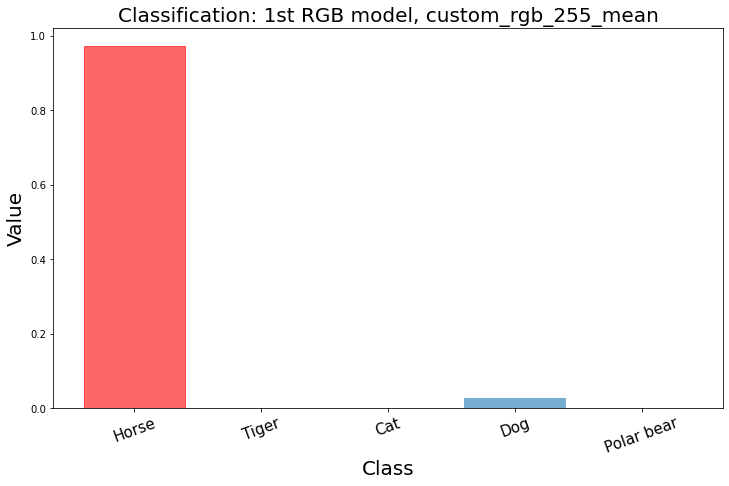


Scores shape        : (1, 5)
Scores values       : [9.4296193e-01 5.3128580e-05 2.8332364e-04 5.6700654e-02 9.1275388e-07]
Scores sum          : 0.9999999
Score of prediction : 0.94296
Class index         : 0
Label               : Horse
Time                : 0.03090


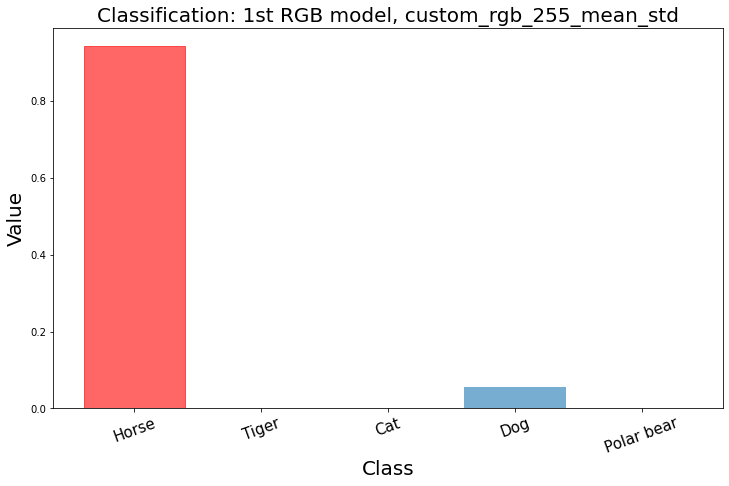


Scores shape        : (1, 5)
Scores values       : [6.1798137e-01 3.1290162e-02 2.3764607e-02 3.2693583e-01 2.8026736e-05]
Scores sum          : 1.0
Score of prediction : 0.61798
Class index         : 0
Label               : Horse
Time                : 0.05114


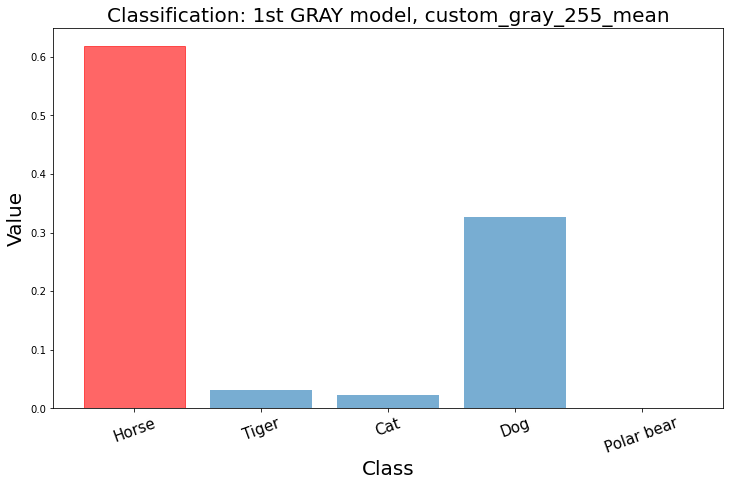


Scores shape        : (1, 5)
Scores values       : [4.7542840e-01 1.0335171e-01 1.3932115e-01 2.8146067e-01 4.3814367e-04]
Scores sum          : 1.0
Score of prediction : 0.47543
Class index         : 0
Label               : Horse
Time                : 0.03124


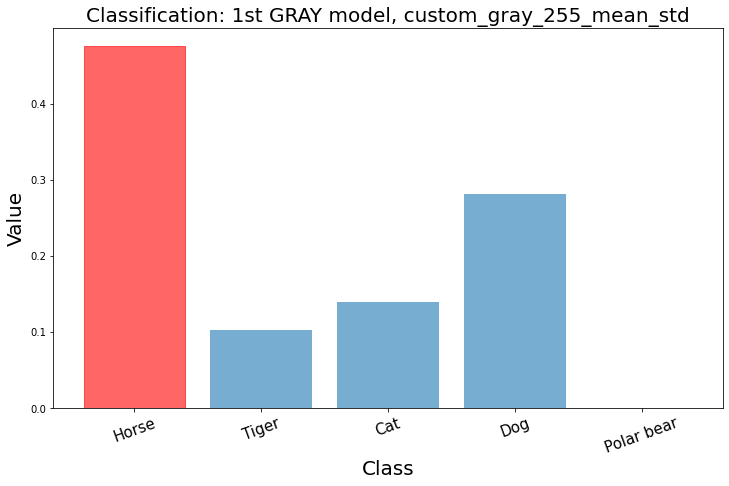

In [15]:
# Magic function that renders the figure in a jupyter notebook
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12, 7)



# Testing RGB model trained on dataset: dataset_custom_rgb_255_mean.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_rgb[0].predict(image_custom_rgb_255_mean)
end = timer()

# Scores are given as 5 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_custom[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],          
          bar_title='1st RGB model, custom_rgb_255_mean',
          show_xticks=True,
          labels=labels_custom)



# Testing RGB model trained on dataset: dataset_custom_rgb_255_mean_std.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_rgb[1].predict(image_custom_rgb_255_mean_std)
end = timer()

# Scores are given as 5 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_custom[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='1st RGB model, custom_rgb_255_mean_std',
          show_xticks=True,
          labels=labels_custom)



# Testing GRAY model trained on dataset: dataset_custom_gray_255_mean.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_gray[0].predict(image_custom_gray_255_mean)
end = timer()

# Scores are given as 5 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_custom[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],          
          bar_title='1st GRAY model, custom_gray_255_mean',
          show_xticks=True,
          labels=labels_custom)



# Testing GRAY model trained on dataset: dataset_custom_gray_255_mean_std.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_gray[1].predict(image_custom_gray_255_mean_std)
end = timer()

# Scores are given as 5 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_custom[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],          
          bar_title='1st GRAY model, custom_gray_255_mean_std',
          show_xticks=True,
          labels=labels_custom)


### Dataset, 2nd model

## Loading saved 2nd model

In [16]:
# Defining lists to collect models in
model_rgb = []
model_gray = []


# Loading 2nd model for custom dataset
for i in range(2):
    model_rgb.append(load_model(full_path_to_code + '/' + 
                                'custom' + '/' + 
                                'model_2_custom_rgb.h5'))
    
    model_gray.append(load_model(full_path_to_code + '/' + 
                                 'custom' + '/' + 
                                 'model_2_custom_gray.h5'))


print('Models are successfully loaded')


Models are successfully loaded


In [17]:
# Showing models' input shapes
print(model_rgb[0].layers[0].input_shape)
print()
print(model_gray[0].layers[0].input_shape)


(None, 64, 64, 3)

(None, 64, 64, 1)


### Dataset, 2nd model

## Loading and assigning best weights

In [18]:
# Preparing list with weights' names
weights = ['w_2_custom_rgb_255_mean.h5',
           'w_2_custom_rgb_255_mean_std.h5',
           'w_2_custom_gray_255_mean.h5',
           'w_2_custom_gray_255_mean_std.h5']


# Loading best weights for 2nd model
for i in range(4):    
    # Checking if it is RGB model
    if i <= 1:
        # loading and assigning best weights
        model_rgb[i].load_weights('custom' + '/' + weights[i])
        
        
        print('Best weights for 2nd RGB model are loaded and assigned  : ', weights[i])
    
    # Checking if it is GRAY model
    elif i >= 2:
        # loading and assigning best weights
        model_gray[i-2].load_weights('custom' + '/' + weights[i])
        
        
        print('Best weights for 2nd GRAY model are loaded and assigned : ', weights[i])


Best weights for 2nd RGB model are loaded and assigned  :  w_2_custom_rgb_255_mean.h5
Best weights for 2nd RGB model are loaded and assigned  :  w_2_custom_rgb_255_mean_std.h5
Best weights for 2nd GRAY model are loaded and assigned :  w_2_custom_gray_255_mean.h5
Best weights for 2nd GRAY model are loaded and assigned :  w_2_custom_gray_255_mean_std.h5


### Dataset, 2nd model

## Predicting with test dataset

In [19]:
# Preparing list with datasets' names
datasets = ['dataset_custom_rgb_255_mean.hdf5',
            'dataset_custom_rgb_255_mean_std.hdf5',
            'dataset_custom_gray_255_mean.hdf5',
            'dataset_custom_gray_255_mean_std.hdf5']


# Defining variable to identify the best model
accuracy_best = 0


# Testing 2nd model with all custom datasets in a loop
for i in range(4):    
    # Opening saved custom dataset from HDF5 binary file
    # Initiating File object
    # Opening file in reading mode by 'r'
    with h5py.File(full_path_to_code + '/' + 'custom' + '/' + datasets[i], 'r') as f:
        # Extracting saved arrays for testing by appropriate keys
        # Saving them into new variables
        x_test = f['x_test']  # HDF5 dataset
        y_test = f['y_test']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_test = np.array(x_test)  # Numpy arrays
        y_test = np.array(y_test)  # Numpy arrays
    
    
    print('Dataset is opened :', datasets[i])
    
    
    # Showing shapes of loaded arrays
    if i == 0:
        print('x_test shape      :', x_test.shape)
        print('y_test shape      :', y_test.shape)
       
    
    # Checking if RGB dataset is opened
    if i <= 1:
        # Testing RGB model with current dataset
        temp = model_rgb[i].predict(x_test)
        
        
        # Showing prediction shape and scores
        if i == 0:
            print('prediction shape  :', temp.shape)  # (278, 5)
            print('prediction scores :', temp[0])  # 5 score numbers
        
        
        # Getting indexes of maximum values along specified axis
        temp = np.argmax(temp, axis=1)
        
        
        # Showing prediction shape after convertion
        # Showing predicted and correct indexes of classes
        if i == 0:
            print('prediction shape  :', temp.shape)  # (278,)
            print('predicted indexes :', temp[0:10])
            print('correct indexes   :', y_test[:10])
        
        
        # Calculating accuracy
        # We compare predicted class with correct class for all input images
        # By saying 'temp == y_test' we create Numpy array with True and False values
        # By function 'np.mean' we calculate mean value:
        # all_True / (all_True + all_False)
        accuracy = np.mean(temp == y_test)
        
        
        # Showing True and False matrix
        if i == 0:
            print('T and F matrix    :', (temp == y_test)[0:10])
        
        
        # Showing calculated accuracy
        print('Testing accuracy  : {0:.5f}'.format(accuracy))
        print()
    
    # Checking if GRAY dataset is opened
    elif i >= 2:
        # Testing GRAY model with current dataset
        temp = model_gray[i-2].predict(x_test)
        
        
        # Getting indexes of maximum values along specified axis
        temp = np.argmax(temp, axis=1)
        
        
        # Calculating accuracy
        # We compare predicted class with correct class for all input images
        # By saying 'temp == y_test' we create Numpy array with True and False values
        # By function 'np.mean' we calculate mean value:
        # all_True / (all_True + all_False)
        accuracy = np.mean(temp == y_test)
        
        
        # Showing calculated accuracy
        print('Testing accuracy  : {0:.5f}'.format(accuracy))
        print()
    
    
    # Identifying the best model
    # Saving predicted indexes of the best model
    if accuracy > accuracy_best:
        # Updating value of the best accuracy
        accuracy_best = accuracy
        
        # Saving predicted indexes of the best model into array
        # Updating array with predicted indexes of the best model
        y_predicted_best = temp
    

Dataset is opened : dataset_custom_rgb_255_mean.hdf5
x_test shape      : (278, 64, 64, 3)
y_test shape      : (278,)
prediction shape  : (278, 5)
prediction scores : [0.01158016 0.03946009 0.6050139  0.32757816 0.01636765]
prediction shape  : (278,)
predicted indexes : [2 0 2 0 1 3 0 0 2 4]
correct indexes   : [1 1 2 2 2 0 2 0 2 4]
T and F matrix    : [False False  True False False False False  True  True  True]
Testing accuracy  : 0.53237

Dataset is opened : dataset_custom_rgb_255_mean_std.hdf5
Testing accuracy  : 0.53597

Dataset is opened : dataset_custom_gray_255_mean.hdf5
Testing accuracy  : 0.52878

Dataset is opened : dataset_custom_gray_255_mean_std.hdf5
Testing accuracy  : 0.51439



### Dataset, 2nd model

## Classification report & Confusion matrix

In [20]:
# Showing the main classification metrics of the best model
print(classification_report(y_test, y_predicted_best))


              precision    recall  f1-score   support

           0       0.71      0.74      0.72        99
           1       0.00      0.00      0.00        19
           2       0.44      0.55      0.49        67
           3       0.35      0.34      0.34        74
           4       0.82      0.74      0.78        19

    accuracy                           0.54       278
   macro avg       0.46      0.47      0.47       278
weighted avg       0.51      0.54      0.52       278



In [21]:
# Each row represents a number of actual class  
# Each column represents a number of predicted class  


# Computing confusion matrix to evaluate accuracy of classification
c_m = confusion_matrix(y_test, y_predicted_best)

# Showing confusion matrix in form of Numpy array
print(c_m)


[[73  0 11 15  0]
 [ 3  0  5 11  0]
 [ 7  2 37 18  3]
 [20  0 29 25  0]
 [ 0  0  3  2 14]]


In [22]:
# Showing labels
print(labels_custom)


['Horse', 'Tiger', 'Cat', 'Dog', 'Polar bear']


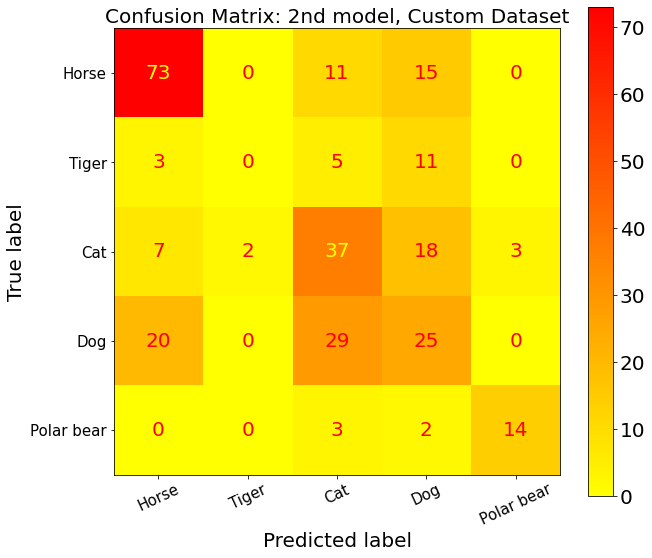

In [23]:
# Magic function that renders the figure in a jupyter notebook
%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of confusion matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels_custom)


# Plotting confusion matrix
# Setting colour map to be used
display_c_m.plot(cmap='autumn_r', xticks_rotation=25)
# Other possible options for colour map are:
# 'OrRd', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix: 2nd model, Custom Dataset', fontsize=20)


# Saving plot
plt.savefig('confusion_matrix_model_2_custom_dataset.png', transparent=True, dpi=500)


# Showing the plot
plt.show()


### Dataset, 2nd model

## Testing on one image

In [24]:
# Showing shapes of loaded Numpy arrays of
# Mean Image and Standard Deviation
print('RGB Mean Image          :', mean_rgb.shape)
print('RGB Standard Deviation  :', std_rgb.shape)
print('GRAY Mean Image         :', mean_gray.shape)
print('GRAY Standard Deviation :', std_gray.shape)


RGB Mean Image          : (64, 64, 3)
RGB Standard Deviation  : (64, 64, 3)
GRAY Mean Image         : (64, 64, 1)
GRAY Standard Deviation : (64, 64, 1)


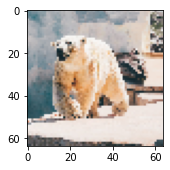

Shape of RGB image         : (64, 64, 3)
Pixels of RGB image        : [113 112 106 113 185]
RGB /255.0                 : [0.44313725 0.43921569 0.41568627 0.44313725 0.7254902 ]
RGB /255.0 => mean         : [-0.04343787 -0.0418087  -0.06422973 -0.03450287  0.24764196]
RGB /255.0 => mean => std  : [-0.15870977 -0.15373842 -0.2371296  -0.12786144  0.91846473]



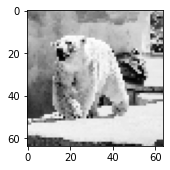

Shape of GRAY image        : (64, 64, 1)
Pixels of GRAY image       : [134 134 128 131 186]
GRAY /255.0                : [0.5254902  0.5254902  0.50196078 0.51372549 0.72941176]
GRAY /255.0 => mean        : [0.05444074 0.06020922 0.0384987  0.05234367 0.26863898]
GRAY /255.0 => mean => std : [0.20436027 0.22714462 0.14600287 0.19956634 1.02654587]


In [25]:
# Magic function that renders the figure in a jupyter notebook
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (2.5, 2.5)



# Reading image by OpenCV library
# In this way image is opened already as Numpy array
# OpenCV by default reads images in BGR order of channels
image_custom_bgr = cv2.imread('images_to_test' + '/' + 'custom_to_test_2.jpg')

# Swapping channels from BGR to RGB by OpenCV function
image_custom_rgb = cv2.cvtColor(image_custom_bgr, cv2.COLOR_BGR2RGB)

# Resizing image to 64 by 64 pixels size
image_custom_rgb = cv2.resize(image_custom_rgb,
                              (64, 64),
                              interpolation=cv2.INTER_CUBIC)

# Showing loaded and resized image
plt.imshow(image_custom_rgb)
plt.show()



# Implementing normalization by dividing image's pixels on 255.0
image_custom_rgb_255 = image_custom_rgb / 255.0

# Implementing normalization by subtracting Mean Image
image_custom_rgb_255_mean = image_custom_rgb_255 - mean_rgb

# Implementing preprocessing by dividing on Standard Deviation
image_custom_rgb_255_mean_std = image_custom_rgb_255_mean / std_rgb

# Showing shape of Numpy array with RGB image
# Showing some pixels' values
print('Shape of RGB image         :', image_custom_rgb.shape)
print('Pixels of RGB image        :', image_custom_rgb[:5, 0, 0])
print('RGB /255.0                 :', image_custom_rgb_255[:5, 0, 0])
print('RGB /255.0 => mean         :', image_custom_rgb_255_mean[:5, 0, 0])
print('RGB /255.0 => mean => std  :', image_custom_rgb_255_mean_std[:5, 0, 0])
print()



# Converting image to GRAY by OpenCV function
image_custom_gray = cv2.cvtColor(image_custom_rgb, cv2.COLOR_RGB2GRAY)

# Extending dimension from (height, width) to (height, width, one channel)
image_custom_gray = image_custom_gray[:, :, np.newaxis]

# Showing converted into GRAY image
plt.imshow(image_custom_gray, cmap=plt.get_cmap('gray'))
plt.show()



# Implementing normalization by dividing image's pixels on 255.0
image_custom_gray_255 = image_custom_gray / 255.0

# Implementing normalization by subtracting Mean Image
image_custom_gray_255_mean = image_custom_gray_255 - mean_gray

# Implementing preprocessing by dividing on Standard Deviation
image_custom_gray_255_mean_std = image_custom_gray_255_mean / std_gray

# Showing shape of Numpy array with GRAY image
# Showing some pixels' values
print('Shape of GRAY image        :', image_custom_gray.shape)
print('Pixels of GRAY image       :', image_custom_gray[:5, 0, 0])
print('GRAY /255.0                :', image_custom_gray_255[:5, 0, 0])
print('GRAY /255.0 => mean        :', image_custom_gray_255_mean[:5, 0, 0])
print('GRAY /255.0 => mean => std :', image_custom_gray_255_mean_std[:5, 0, 0])


In [26]:
# Extending dimension from (height, width, channels) to (1, height, width, channels)
image_custom_rgb_255_mean = image_custom_rgb_255_mean[np.newaxis, :, :, :]
image_custom_rgb_255_mean_std = image_custom_rgb_255_mean_std[np.newaxis, :, :, :]

image_custom_gray_255_mean = image_custom_gray_255_mean[np.newaxis, :, :, :]
image_custom_gray_255_mean_std = image_custom_gray_255_mean_std[np.newaxis, :, :, :]

# Showing shapes of extended Numpy arrays
print('RGB /255.0 => mean         :', image_custom_rgb_255_mean.shape)
print('RGB /255.0 => mean => std  :', image_custom_rgb_255_mean_std.shape)
print()
print('GRAY /255.0 => mean        :', image_custom_gray_255_mean.shape)
print('GRAY /255.0 => mean => std :', image_custom_gray_255_mean_std.shape)


RGB /255.0 => mean         : (1, 64, 64, 3)
RGB /255.0 => mean => std  : (1, 64, 64, 3)

GRAY /255.0 => mean        : (1, 64, 64, 1)
GRAY /255.0 => mean => std : (1, 64, 64, 1)


In [27]:
# Showing information about created function
print(help(bar_chart))


Help on function bar_chart in module __main__:

bar_chart(scores, bar_title, show_xticks=True, labels=None)
    # Defining function to plot bar chart with scores values

None



Scores shape        : (1, 5)
Scores values       : [0.14439279 0.09082873 0.07560811 0.55012304 0.1390473 ]
Scores sum          : 1.0
Score of prediction : 0.55012
Class index         : 3
Label               : Dog
Time                : 0.35385


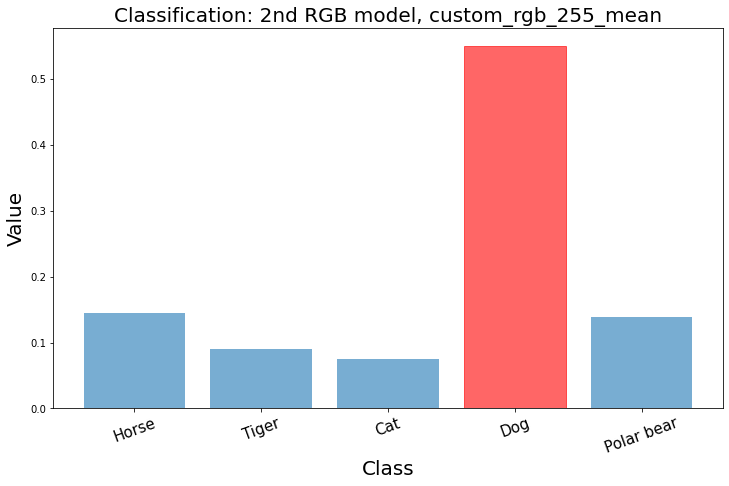


Scores shape        : (1, 5)
Scores values       : [1.8275287e-02 1.4857501e-04 6.4783688e-03 3.7120479e-01 6.0389298e-01]
Scores sum          : 1.0
Score of prediction : 0.60389
Class index         : 4
Label               : Polar bear
Time                : 0.03324


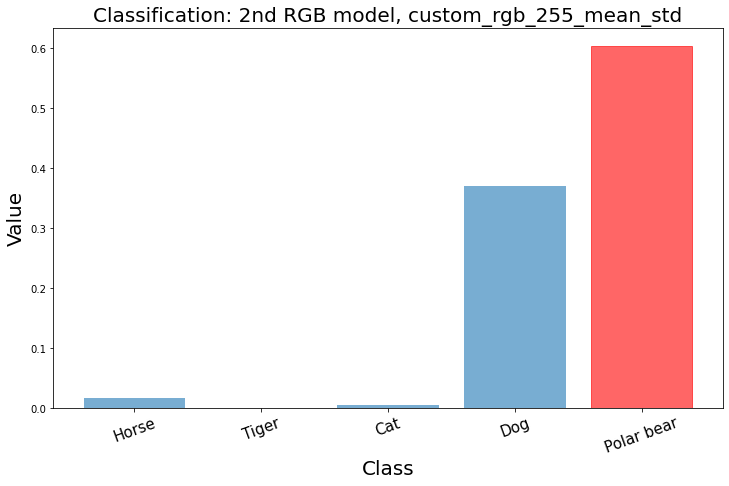


Scores shape        : (1, 5)
Scores values       : [0.25658324 0.13653837 0.12803915 0.3463229  0.13251634]
Scores sum          : 0.99999994
Score of prediction : 0.34632
Class index         : 3
Label               : Dog
Time                : 0.18034


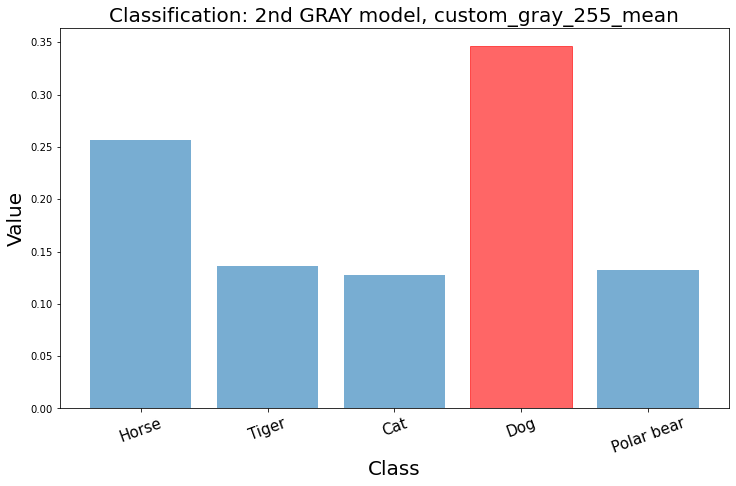


Scores shape        : (1, 5)
Scores values       : [0.00842956 0.01427349 0.11880589 0.37141943 0.48707163]
Scores sum          : 1.0
Score of prediction : 0.48707
Class index         : 4
Label               : Polar bear
Time                : 0.03668


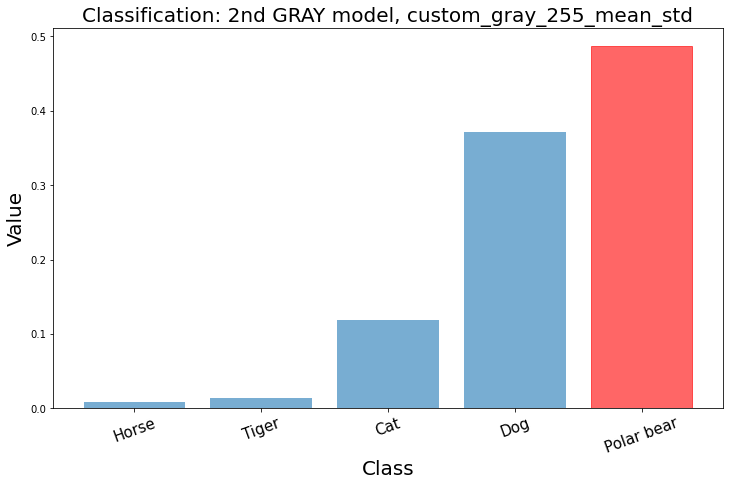

In [28]:
# Magic function that renders the figure in a jupyter notebook
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12, 7)



# Testing RGB model trained on dataset: dataset_custom_rgb_255_mean.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_rgb[0].predict(image_custom_rgb_255_mean)
end = timer()

# Scores are given as 5 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_custom[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='2nd RGB model, custom_rgb_255_mean',
          show_xticks=True,
          labels=labels_custom)



# Testing RGB model trained on dataset: dataset_custom_rgb_255_mean_std.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_rgb[1].predict(image_custom_rgb_255_mean_std)
end = timer()

# Scores are given as 5 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_custom[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='2nd RGB model, custom_rgb_255_mean_std',
          show_xticks=True,
          labels=labels_custom)



# Testing GRAY model trained on dataset: dataset_custom_gray_255_mean.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_gray[0].predict(image_custom_gray_255_mean)
end = timer()

# Scores are given as 5 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_custom[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='2nd GRAY model, custom_gray_255_mean',
          show_xticks=True,
          labels=labels_custom)



# Testing GRAY model trained on dataset: dataset_custom_gray_255_mean_std.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_gray[1].predict(image_custom_gray_255_mean_std)
end = timer()

# Scores are given as 5 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_custom[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='2nd GRAY model, custom_gray_255_mean_std',
          show_xticks=True,
          labels=labels_custom)
